In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [315]:
df = pd.read_csv('healthcare.csv')

# 1) 
### a. Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [316]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [317]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [318]:
df.shape

(303, 14)

### b.Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy.

In [319]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [320]:
df.drop_duplicates(inplace=True)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


# 2)
### a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data.

In [322]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot .

In [323]:
cols = df.columns
num_cols = df._get_numeric_data().columns
num_cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [324]:
for col in df:
    print(col,"=",df[col].unique())

age = [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex = [1 0]
cp = [3 2 1 0]
trestbps = [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol = [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs =

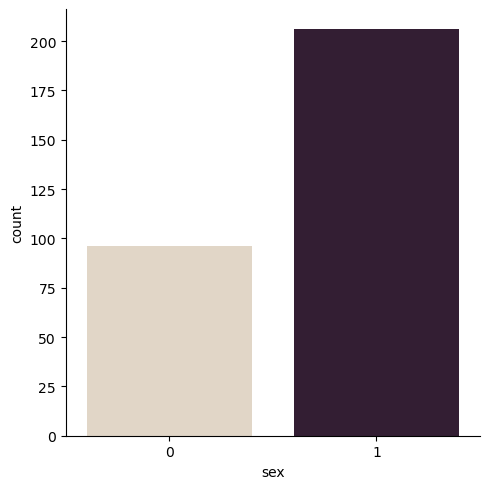

In [325]:
%matplotlib inline
sns.catplot(data=df, x="sex", kind="count", palette="ch:.25")

***Gender Distribution: The dataset comprises approximately 100 females and 200 males.***

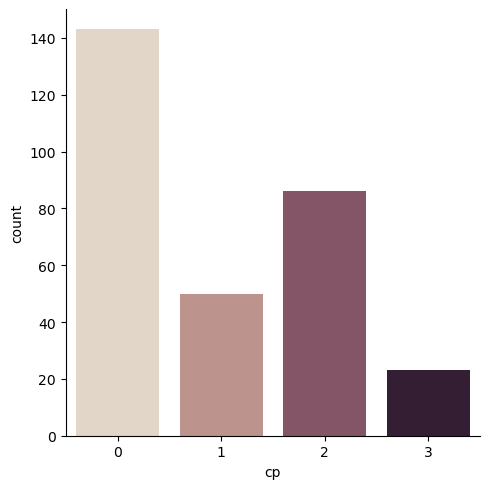

In [326]:
sns.catplot(data=df, x="cp", kind="count", palette="ch:.25")

***Chest Pain Type: Highest number of individual have type'0' chest pain, followed by type'2', type'1', and last type'3'.***

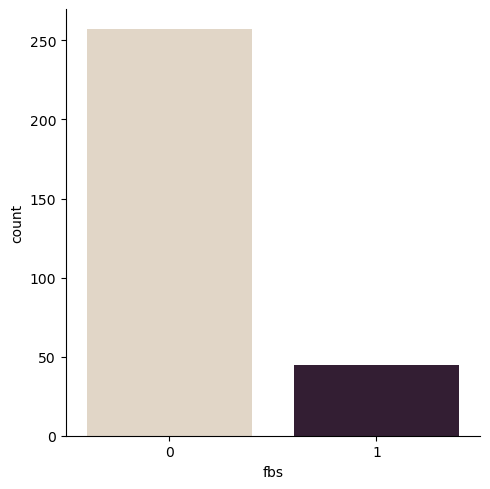

In [327]:
sns.catplot(data=df, x="fbs", kind="count", palette="ch:.25")

***Fasting Blood Sugar: Fewer than 50 patients had fasting blood sugar levels below 120 mg/dl.***

### c.	Study the occurrence of CVD across the Age category.

Text(0, 0.5, 'Count')

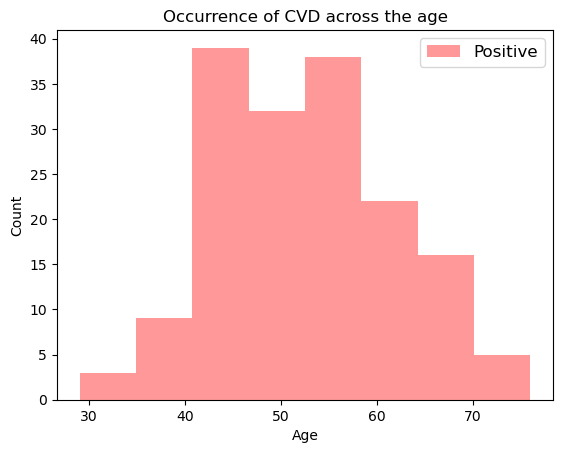

In [381]:
dfn = df[df.target == 1]
sns.distplot(dfn['age'], bins=8, kde=False, color='red', label='Positive');

# Plotting
plt.legend(prop={'size': 12})
plt.title('Occurrence of CVD across the age')
plt.xlabel('Age')
plt.ylabel('Count')

***Age Distribution: Positive CVD cases were observed predominantly among individuals aged between 42 to 58 years.***

### d.	Study the composition of all patients with respect to the Sex category.

In [329]:
sex_target = pd.crosstab(index = df['sex'],columns='sex')
sex_target

col_0,sex
sex,
0,96
1,206


### e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient.

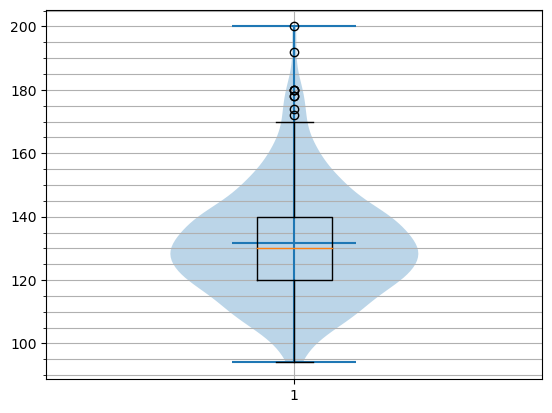

In [330]:
plt.violinplot(df.trestbps,showmeans=True,showextrema=True)
plt.boxplot(df.trestbps);
plt.grid()
plt.minorticks_on()
plt.grid(which='minor')

In [331]:
# Trimming Outliers

percentile25 = df['trestbps'].quantile(0.25)
percentile75 = df['trestbps'].quantile(0.75)
print('25th Percentile =',percentile25)
print('75th Percentile =',percentile75)

25th Percentile = 120.0
75th Percentile = 140.0


In [332]:
upper_limit = percentile75 + 1.5 * 20
lower_limit = percentile25 - 1.5 * 20
print('Upper limit = ',upper_limit)
print('Lower limit = ',lower_limit)

Upper limit =  170.0
Lower limit =  90.0


In [333]:
new_df = df[df['trestbps'] < upper_limit]
new_df.shape

(289, 14)

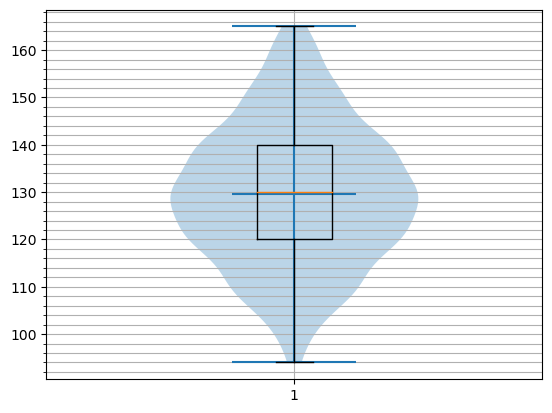

In [334]:
plt.violinplot(new_df.trestbps,showmeans=True,showextrema=True)
plt.boxplot(new_df.trestbps);
plt.minorticks_on()
plt.grid(which='minor')
plt.grid()

***The data contains people with a wide range of resting blood pressure (trestbps). Blood pressure is considered normal when it is lower than 120 mmHg, elevated blood pressure ranges from 120 to 139 mmHg, and high blood pressure is anything from 140 mmHg and above.***

https://www.cedars-sinai.org/health-library/diseases-and-conditions/h/high-blood-pressure-hypertension.html#:~:text=Normal%20blood%20pressure%20is%20systolic,diastolic%20is%2080%20to%2089.

In [335]:
df_normal_rbp = new_df[new_df.trestbps < 120]

In [336]:
df_elevated_rbp = new_df[new_df.trestbps>=120 ]
df_elevated_rbp = df_elevated_rbp[df_elevated_rbp.trestbps<=139]

In [337]:
df_high_rbp = new_df[new_df.trestbps >= 140]

In [338]:
def percent_calc (ax, feature):
    total = len(feature)
    print(total)
    for p in ax.patches:                                           # ax.patches gives the starting point, width, height, and angle of each bar in the plot.
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)  # Used decimal formatting for percentage
        x = p.get_x() + p.get_width() / 2 - 0.05                   # diducted 0.05 to move the number littel to the left.
        y = p.get_y() + p.get_height() + 0.3                       # Added 0.3 to move the number little upward.
        ax.annotate(percentage, (x, y), size = 7)

60
145
84


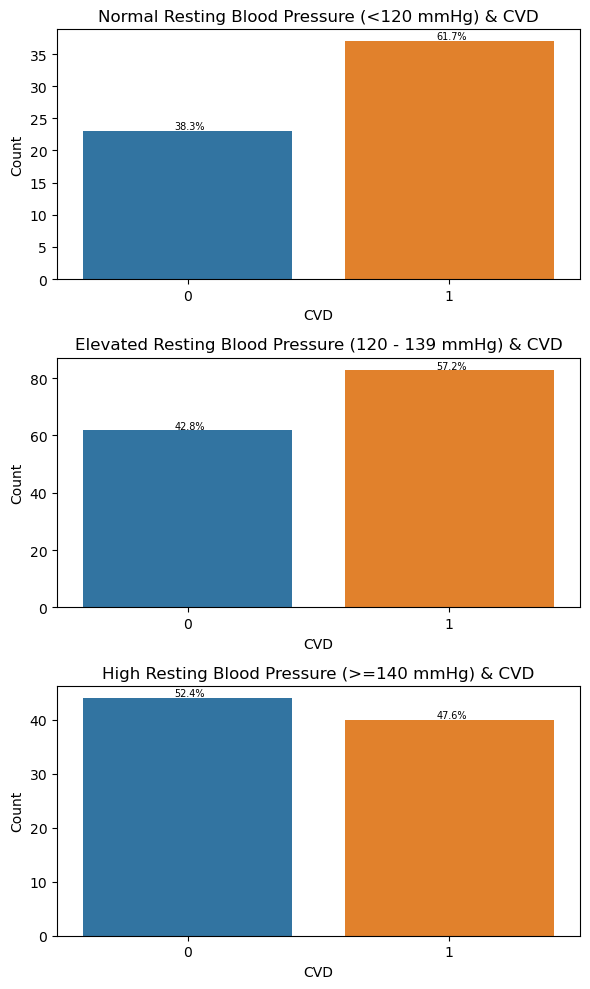

In [339]:
plt.figure(figsize=(6, 10))
plt.subplot(3,1,1)
ax=sns.countplot(df_normal_rbp['target'])
plt.title('Normal Resting Blood Pressure (<120 mmHg) & CVD')
plt.xlabel('CVD')
plt.ylabel('Count')
percent_calc(ax,df_normal_rbp.target)

plt.subplot(3,1,2)
ax=sns.countplot(df_elevated_rbp['target'])
plt.title('Elevated Resting Blood Pressure (120 - 139 mmHg) & CVD')
plt.xlabel('CVD')
plt.ylabel('Count')
percent_calc(ax,df_elevated_rbp.target)

plt.subplot(3,1,3)
ax=sns.countplot(df_high_rbp['target'])
plt.title('High Resting Blood Pressure (>=140 mmHg) & CVD')
plt.xlabel('CVD')
plt.ylabel('Count')
plt.tight_layout()
percent_calc(ax,df_high_rbp.target)

   - Normal Blood Pressure (<120 mmHg): 61.7% tested positive for CVD out of 60 individuals.
   - Elevated Blood Pressure (120-139 mmHg): 57.2% tested positive for CVD out of 145 individuals.
   - High Blood Pressure (>=140 mmHg): 47.6% tested positive for CVD out of 84 individuals.

### f.	Describe the relationship between cholesterol levels and a target variable.

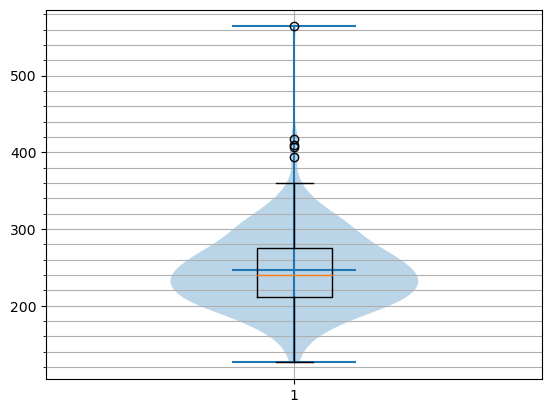

In [340]:
plt.violinplot(df.chol,showmeans=True,showextrema=True)
plt.boxplot(df.chol);
plt.minorticks_on()
plt.grid(which='minor')
plt.grid()

In [341]:
# Trimming Outliers

percentile25 = df['chol'].quantile(0.25)
percentile75 = df['chol'].quantile(0.75)
print('25th Percentile =',percentile25)
print('75th Percentile =',percentile75)

25th Percentile = 211.0
75th Percentile = 274.75


In [342]:
upper_limit = percentile75 + 1.5 * 63.75
lower_limit = percentile25 - 1.5 * 63.75
print('Upper limit = ',upper_limit)
print('Lower limit = ',lower_limit)

Upper limit =  370.375
Lower limit =  115.375


In [343]:
new_df = df[df['chol'] < upper_limit]
new_df.shape

(297, 14)

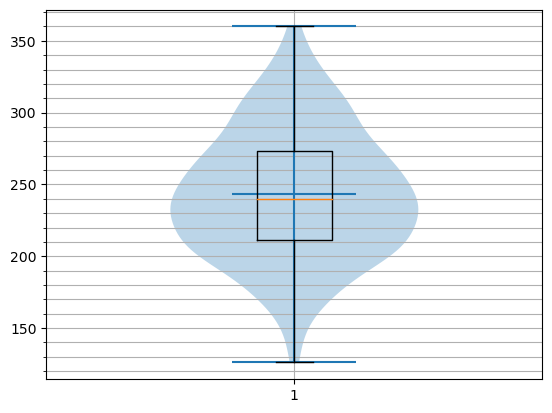

In [344]:
plt.violinplot(new_df.chol,showmeans=True,showextrema=True)
plt.boxplot(new_df.chol);
plt.minorticks_on()
plt.grid(which='minor')
plt.grid()

***After removing outliers, it can be seen that the majority of people have cholesterol between 210 to 250 mg/dl. Serum cholesterol level less than 200 mg/dl is considered normal, from 200 to 239 mg/dl is considered borderline high, and anything above 239 mg/dl is considered high.***

https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/lipid-panel#:~:text=Here%20are%20the%20ranges%20for,or%20above%20240%20mg%2FdL

In [384]:
df_normal_chol = new_df[new_df.chol < 200]

In [385]:
df_borderline_high_chol = new_df[new_df.chol>=200 ]
df_borderline_high_chol = df_borderline_high_chol[df_borderline_high_chol.chol<=239]

In [386]:
df_high_chol = new_df[new_df.chol > 239]

49
98
150


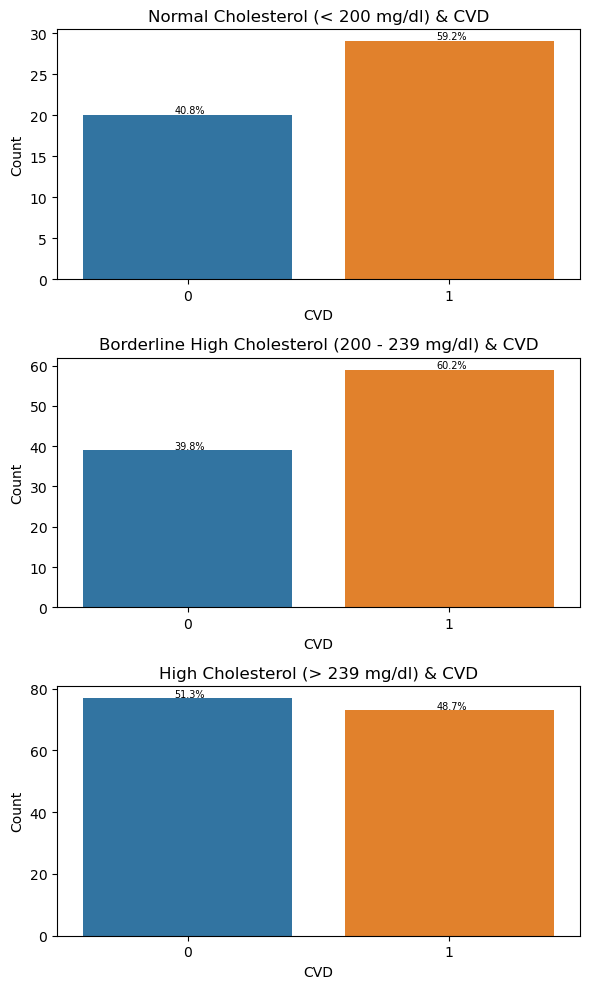

In [387]:
plt.figure(figsize=(6, 10))
plt.subplot(3,1,1)
ax=sns.countplot(df_normal_chol['target'])
plt.title('Normal Cholesterol (< 200 mg/dl) & CVD')
plt.xlabel('CVD')
plt.ylabel('Count')
percent_calc(ax,df_normal_chol.target)

plt.subplot(3,1,2)
ax=sns.countplot(df_borderline_high_chol['target'])
plt.title('Borderline High Cholesterol (200 - 239 mg/dl) & CVD')
plt.xlabel('CVD')
plt.ylabel('Count')
percent_calc(ax,df_borderline_high_chol.target)

plt.subplot(3,1,3)
ax=sns.countplot(df_high_chol['target'])
plt.title('High Cholesterol (> 239 mg/dl) & CVD')
plt.xlabel('CVD')
plt.ylabel('Count')
percent_calc(ax,df_high_chol.target)

plt.tight_layout()

   - Normal (<200 mg/dl): 59.2% tested positive for CVD out of 49 individuals.
   - Borderline High (200-239 mg/dl): 60.2% tested positive for CVD out of 98 individuals.
   - High (>239 mg/dl): 49% tested positive for CVD out of 155 individuals.

### g.	State what relationship exists between peak exercising and the occurrence of a heart attack.

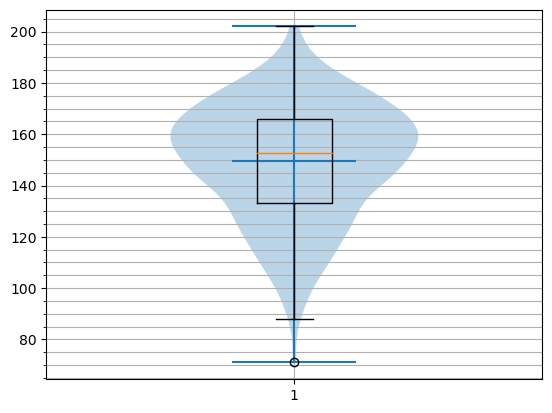

In [349]:
plt.violinplot(df.thalach,showmeans=True,showextrema=True)
plt.boxplot(df.thalach,);
plt.minorticks_on()
plt.grid(which='minor')
plt.grid()

Text(0, 0.5, 'Count')

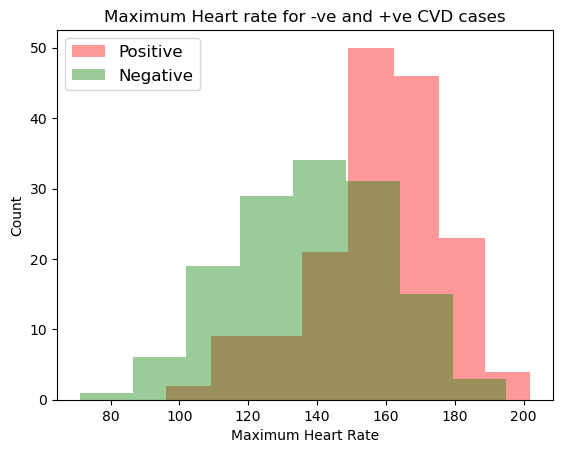

In [389]:
dfn = df[df.target == 1]
sns.distplot(dfn['thalach'], bins=8, kde=False, color='red', label='Positive')
dfn = df[df.target == 0]
sns.distplot(dfn['thalach'], bins=8, kde=False, color='green', label='Negative')

# Plotting
plt.legend(prop={'size': 12})
plt.title('Maximum Heart rate for -ve and +ve CVD cases')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Count')

***Maximum Heart Rate (thalach): In all positive CVD cases, most individuals achieved maximim heart rate from 150 to 175. While in negative cases most individuals achieved maximim heart rate from 135 to 165.***

### i.	List how the other factors determine the occurrence of CVD

In [353]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


### j.	Use a pair plot to understand the relationship between all the given variables

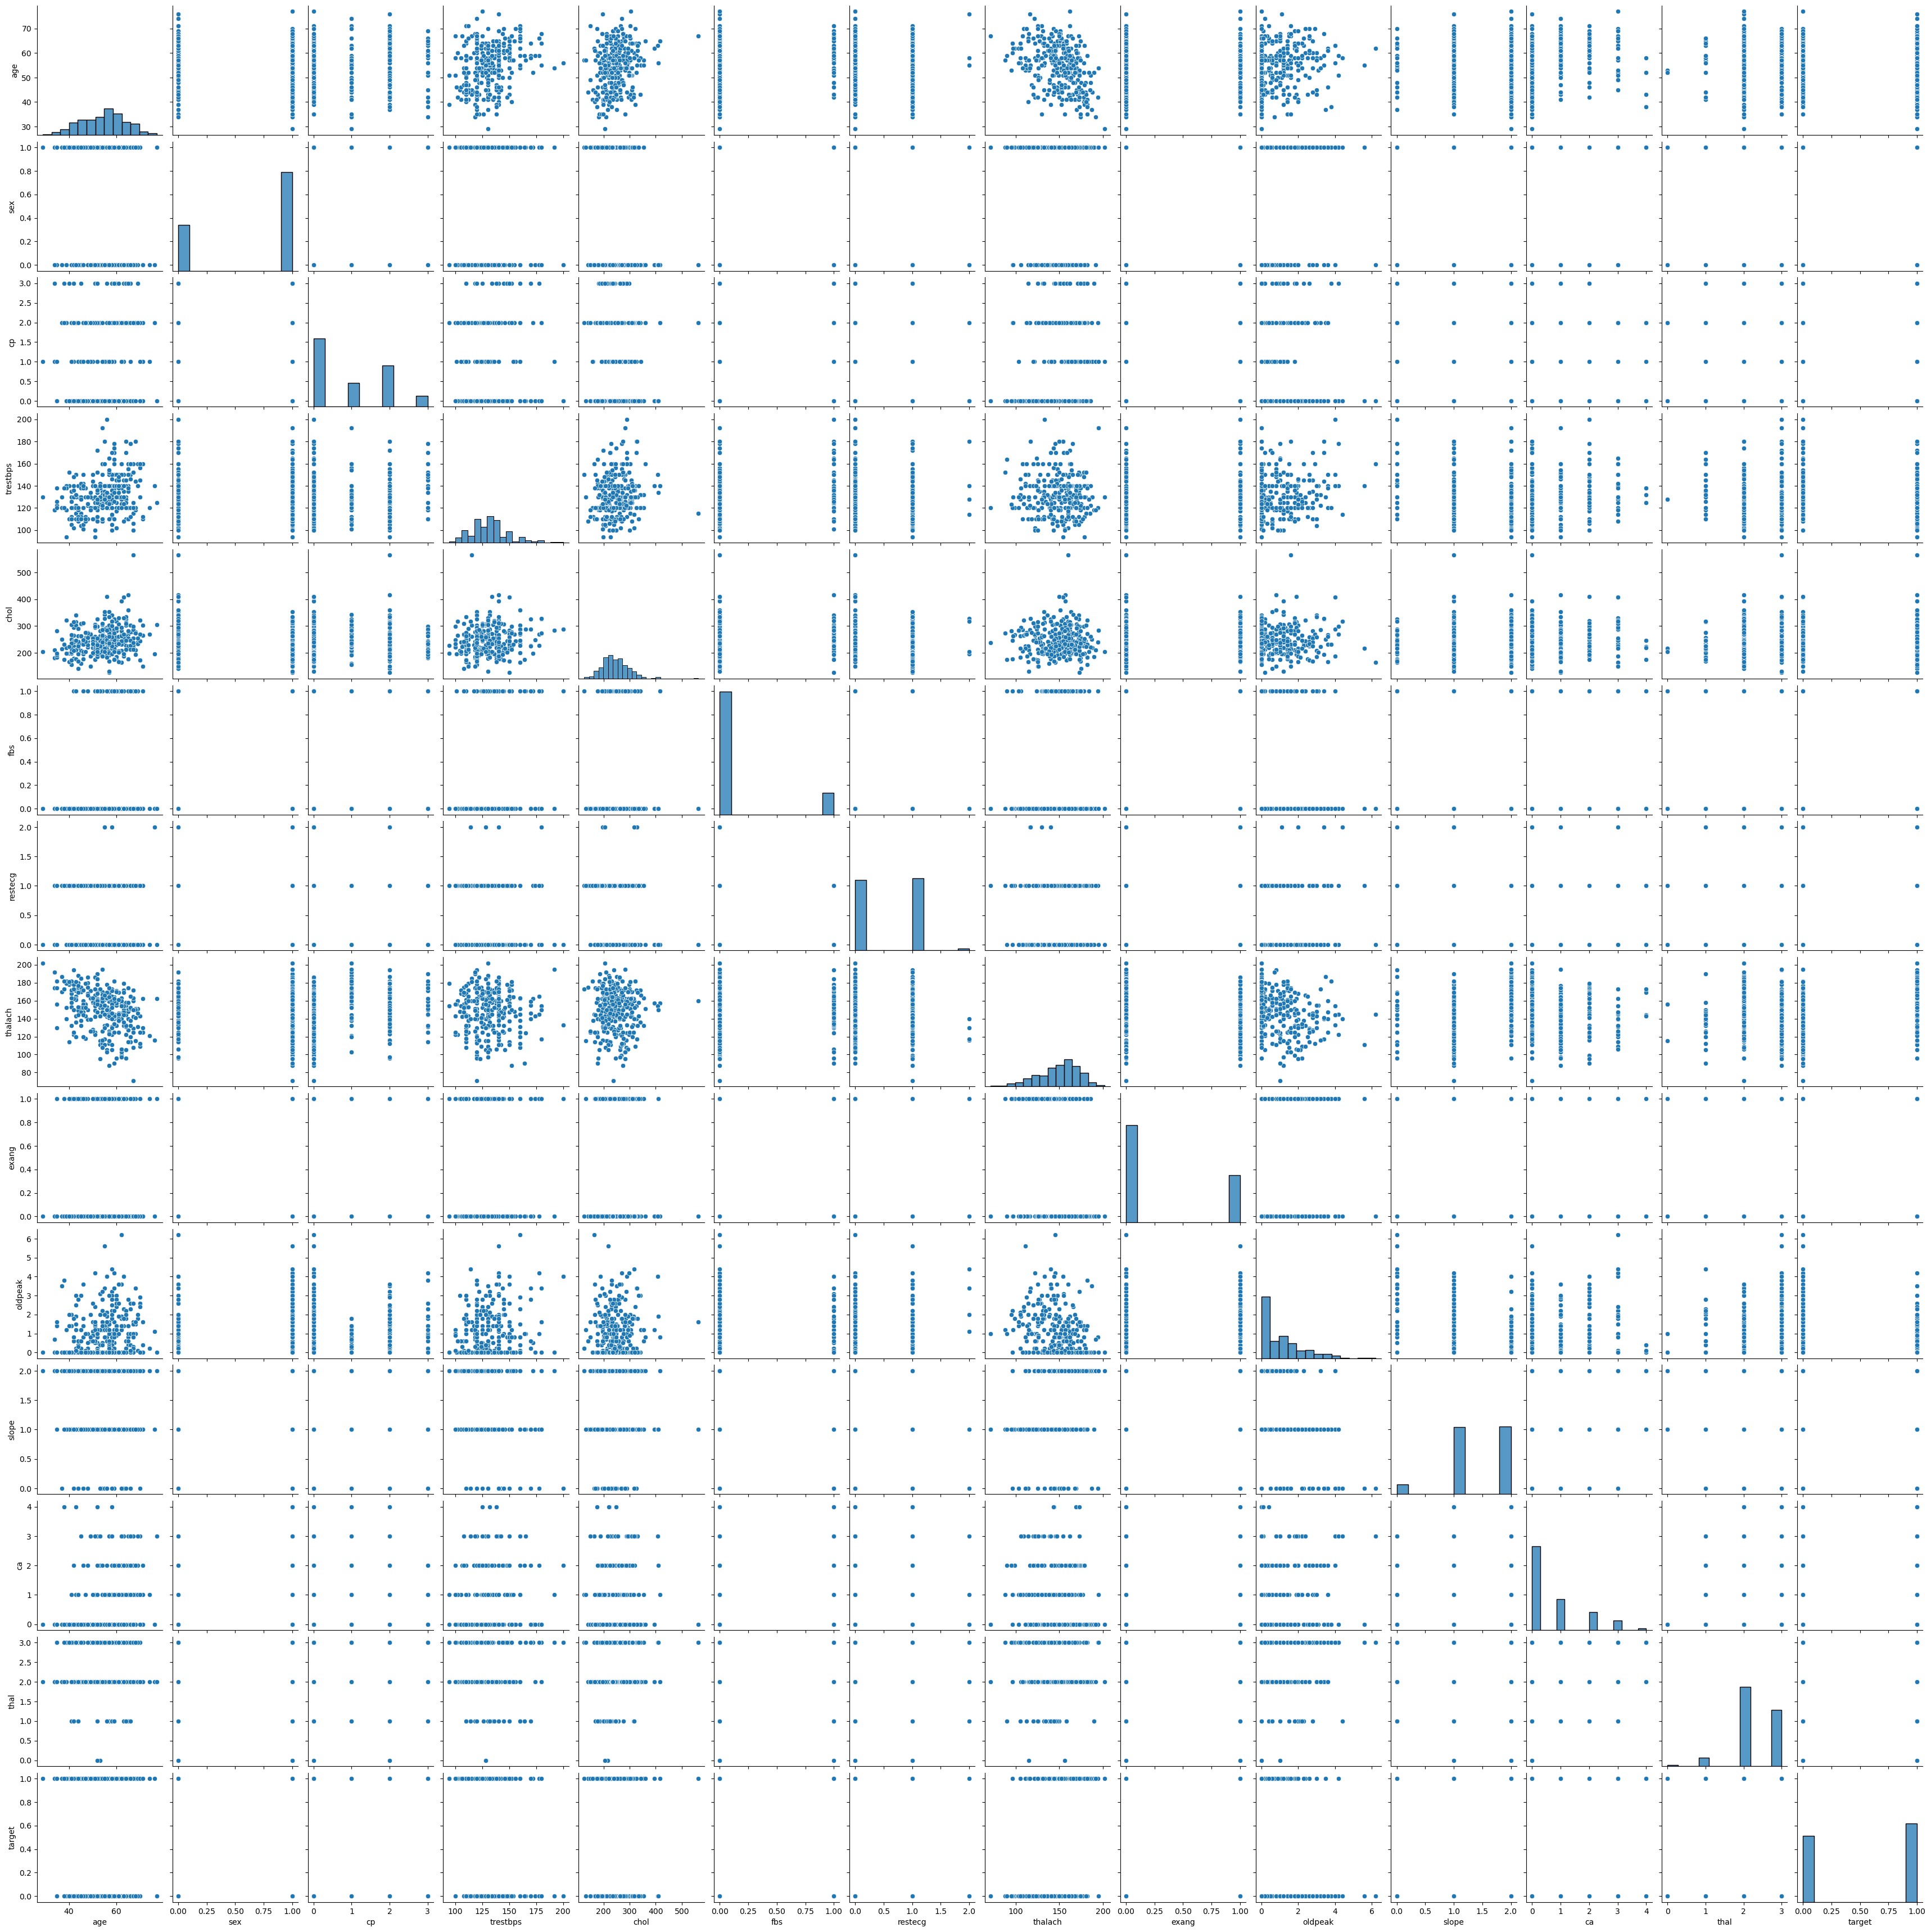

In [354]:
sns.pairplot(df)

# Logistic Regression

In [431]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [432]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df[['target']]

In [433]:
X.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2


In [434]:
y.head(3)

,target
0,1
1,1
2,1


In [435]:
df.shape

(302, 14)

In [436]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=1)

In [437]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(241, 13)
(241, 1)
(61, 13)
(61, 1)


In [438]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

# Training the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [490]:
# probability prediction on train data
prob_train = log_reg.predict_proba(X_train)
prob_train[0:5]

array([[0.09180227, 0.90819773],
       [0.12512495, 0.87487505],
       [0.29411823, 0.70588177],
       [0.93328224, 0.06671776],
       [0.14847384, 0.85152616]])

In [440]:
# prediction on train data
predict_train = log_reg.predict(X_train)

In [441]:
predict_train

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [442]:
from sklearn.metrics import confusion_matrix, classification_report

In [443]:
# prediction on train data
predict_train = log_reg.predict(X_train)

# Actual Value --> y_trian
# Prediction   --> predict_train
print("=====================Confusion matrix for train data======================\n")
print(confusion_matrix(y_train, predict_train))
print("\n===================Classification report for train data===================\n")
print(classification_report(y_train, predict_train))

=====================Confusion matrix for train data======================

[[ 87  22]
 [ 10 122]]

===================Classification report for train data===================

              precision    recall  f1-score   support

           0       0.90      0.80      0.84       109
           1       0.85      0.92      0.88       132

    accuracy                           0.87       241
   macro avg       0.87      0.86      0.86       241
weighted avg       0.87      0.87      0.87       241



In [444]:
# prediction on test data
predict_test = log_reg.predict(X_test)

# Actual Value --> y_test
# Prediction   --> predict_test
print("=====================Confusion matrix for train data======================\n")
print(confusion_matrix(y_test, predict_test))
print("\n===================Classification report for test data===================\n")
print(classification_report(y_test, predict_test))

=====================Confusion matrix for train data======================

[[20  9]
 [ 3 29]]

===================Classification report for test data===================

              precision    recall  f1-score   support

           0       0.87      0.69      0.77        29
           1       0.76      0.91      0.83        32

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



 ***Logistic Regression Model: The logistic regression model performed well when trained on 80% of the data. It achieved an accuracy of 87% on the training data and 80% on the test data. Furthermore, it correctly identified 76% of all positive CVD cases.***

# Random Forest

In [445]:
df.shape

(302, 14)

In [446]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df[['target']]

In [456]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=1)

In [457]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(241, 13)
(241, 1)
(61, 13)
(61, 1)


In [479]:
from sklearn.ensemble import RandomForestClassifier
rd_fst = RandomForestClassifier( max_depth = 3, criterion='entropy', n_estimators = 65)

# training the model
rd_fst.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=65)

In [480]:
# prediction on train data
predict_train = rd_fst.predict(X_train)

# Actual Value --> y_trian
# Prediction   --> predict_train
print("=====================Confusion matrix for train data======================\n")
print(confusion_matrix(y_train, predict_train))
print("\n===================Classification report for train data===================\n")
print(classification_report(y_train, predict_train))

=====================Confusion matrix for train data======================

[[ 90  19]
 [  8 124]]

===================Classification report for train data===================

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       109
           1       0.87      0.94      0.90       132

    accuracy                           0.89       241
   macro avg       0.89      0.88      0.89       241
weighted avg       0.89      0.89      0.89       241



In [481]:
# prediction on test data
predict_test = rd_fst.predict(X_test)

# Actual Value --> y_test
# Prediction   --> predict_test
print("=====================Confusion matrix for train data======================\n")
print(confusion_matrix(y_test, predict_test))
print("\n===================Classification report for test data===================\n")
print(classification_report(y_test, predict_test))

=====================Confusion matrix for train data======================

[[22  7]
 [ 3 29]]

===================Classification report for test data===================

              precision    recall  f1-score   support

           0       0.88      0.76      0.81        29
           1       0.81      0.91      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



 ***Random Forest Model: The random forest model outperformed logistic regression when trained on 80% of the data. With specific hyperparameters (max_depth = 3, criterion='entropy', n_estimators = 65), it achieved an accuracy of 89% on the training data and 84% on the test data. It also identified 81% of all positive CVD cases.***

# Correlation Analysis using statsmodels logistic regression
### and 2) i.	 Check if thalassemia is a major cause of CVD

In [482]:
import statsmodels.api as sm

In [483]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [484]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df[['target']]

In [485]:
X= sm.add_constant(X)

In [486]:
mdl = sm.Logit(y,X)
res = mdl.fit()

Optimization terminated successfully.
         Current function value: 0.348265
         Iterations 7


In [487]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                           13
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.4949
Time:                        17:58:59   Log-Likelihood:                -105.18
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 7.740e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3042      2.578      1.282      0.200      -1.748       8.357
age           -0.0015      0.023     -0.063      0.950      -0.047       0.045
sex           -1.7509      0.468     -3.740      0.0

***Logistic Regression with Statsmodels: Logistic regression was also performed using Statsmodels, revealing features with p-values less than 0.05 as significant predictors of CVD. The significant features include 'sex', 'cp' (chest pain type), 'thalach' (maximum heart rate achieved), 'exang' (exercise-induced angina), 'oldpeak', 'ca' (number of major vessels colored by fluoroscopy), and 'thal' (thalassemia).***